# **Importing libraries**

In [18]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [19]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation (1).csv


# **Data loading and visualising.**

In [20]:
data = pd.read_csv('Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [21]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# **Dividing data into training and testing parts**

In [22]:
X = data.iloc[:, 0:-1].values # iloc is function for indexing of dataframes.
Y = data.label.values

# OneHotEncoding
encoder = OneHotEncoder() # using encoding of class_type as this is a multi class problem.
Y = encoder.fit_transform(Y.reshape(-1,1)).toarray() # fitting our data to encoder.

X, Y

(array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
           6.50298529, 202.9355362 ],
        [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
           7.03809636, 226.6555374 ],
        [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
           7.84020714, 263.9642476 ],
        ...,
        [118.        ,  33.        ,  30.        , ...,  67.22512329,
           6.36260785, 173.3228386 ],
        [117.        ,  32.        ,  34.        , ...,  52.12739421,
           6.75879255, 127.1752928 ],
        [104.        ,  18.        ,  30.        , ...,  60.39647474,
           6.77983261, 140.9370415 ]]), array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [23]:
# train_test_split is a function used to split our data for training and testing purpose.
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

# **MLP**

In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(7,22), max_iter=500, activation='relu')
mlp.fit(x_train, y_train)
pred = mlp.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [25]:
y_pred_con = mlp.predict(x_test)
y_pred, y_correct = [], []

for i in y_test:
    y_correct.append(np.argmax(i))
for j in y_pred_con:
    y_pred.append(np.argmax(j))
    
pred_df = pd.DataFrame()
pred_df['Pred_class'] = y_pred
pred_df['Correct_class'] = y_correct
pred_df

,Pred_class,Correct_class
0,21,21
1,21,21
2,7,7
3,3,3
4,2,2
...,...,...
435,18,18
436,1,1
437,6,6
438,0,2


              precision    recall  f1-score   support

           0       1.00      0.32      0.48        57
           1       1.00      1.00      1.00        18
           2       0.64      0.78      0.70        18
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       0.94      0.94      0.94        17
           6       1.00      0.84      0.91        19
           7       1.00      1.00      1.00        18
           8       0.76      0.76      0.76        21
           9       1.00      0.95      0.98        21
          10       0.94      1.00      0.97        16
          11       0.56      1.00      0.71        10
          12       1.00      0.95      0.98        22
          13       0.64      0.94      0.76        17
          14       0.88      0.94      0.91        16
          15       1.00      1.00      1.00        23
          16       0.96      1.00      0.98        22
          17       0.52    

Text(42.0, 0.5, 'Truth')

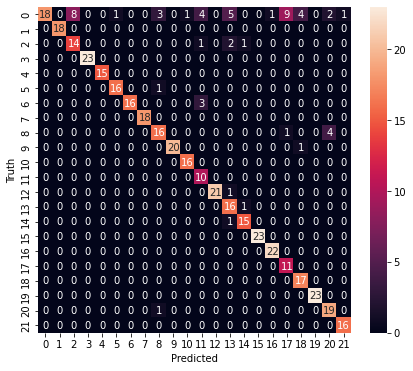

In [26]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import tensorflow as tf
print(classification_report(y_pred, y_correct))
cm = tf.math.confusion_matrix(y_pred, y_correct)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error, mean_absolute_percentage_error
print(accuracy_score(y_pred, y_correct))
print(mean_absolute_error(y_pred, y_correct))
print(mean_squared_error(y_pred, y_correct))
print(max_error(y_pred, y_correct))

0.8704545454545455
1.3818181818181818
19.336363636363636
21


# **Creating ANN Model**

In [28]:
# creating model
model = Sequential()

# adding hidden layers with number of units and activation function.
model.add(Dense(units = 64, activation = 'relu', input_dim = 7)) #hiddenlayer1 with and extra parameter input dimensions which is 16 in out case that is no. of features in training data.
model.add(Dense(units = 32, activation = 'relu')) #hiddenlayer2
model.add(Dense(units = 22, activation = 'sigmoid')) #outputlayer

# compiling our model.
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) #metrics are the list of parameters on which we test our model like accuracy.

In [29]:
# fitting data to train our model and then validating score with validation_data.
model.fit(x_train, y_train, epochs=40, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/40
220/220 [==============================] - 2s 3ms/step - loss: 6.5636 - accuracy: 0.3699 - val_loss: 0.9116 - val_accuracy: 0.7295
Epoch 2/40
220/220 [==============================] - 1s 3ms/step - loss: 0.6588 - accuracy: 0.7920 - val_loss: 0.4539 - val_accuracy: 0.8545
Epoch 3/40
220/220 [==============================] - 1s 3ms/step - loss: 0.3630 - accuracy: 0.8869 - val_loss: 0.3091 - val_accuracy: 0.9068
Epoch 4/40
220/220 [==============================] - 1s 3ms/step - loss: 0.2895 - accuracy: 0.9085 - val_loss: 0.5154 - val_accuracy: 0.8727
Epoch 5/40
220/220 [==============================] - 1s 3ms/step - loss: 0.2308 - accuracy: 0.9239 - val_loss: 0.2110 - val_accuracy: 0.9205
Epoch 6/40
220/220 [==============================] - 1s 3ms/step - loss: 0.1954 - accuracy: 0.9358 - val_loss: 0.2329 - val_accuracy: 0.9182
Epoch 7/40
220/220 [==============================] - 1s 3ms/step - loss: 0.1788 - accuracy: 0.9392 - val_loss: 0.1603 - val_accuracy: 0.9432
Epoch 

In [30]:
# printing score with evaluate
print(model.evaluate(x_test, y_test)[1])

14/14 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9545
0.9545454382896423


In [31]:
y_pred_con = model.predict(x_test)
y_pred, y_correct = [], []

for i in y_test:
    y_correct.append(np.argmax(i))
for j in y_pred_con:
    y_pred.append(np.argmax(j))
    
pred_df = pd.DataFrame()
pred_df['Pred_class'] = y_pred
pred_df['Correct_class'] = y_correct
pred_df

,Pred_class,Correct_class
0,21,21
1,21,21
2,0,7
3,3,3
4,2,2
...,...,...
435,18,18
436,1,1
437,6,6
438,2,2


In [32]:
confusion_matrix(y_pred, y_correct)

array([[18,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67        36
           1       1.00      1.00      1.00        18
           2       0.86      0.90      0.88        21
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17
           6       0.94      0.88      0.91        17
           7       0.00      0.00      0.00         0
           8       1.00      0.46      0.63        46
           9       1.00      1.00      1.00        20
          10       0.94      1.00      0.97        16
          11       0.89      0.94      0.91        17
          12       1.00      0.95      0.98        22
          13       0.92      0.82      0.87        28
          14       1.00      0.85      0.92        20
          15       1.00      0.88      0.94        26
          16       0.87      1.00      0.93        20
          17       0.90    

Text(42.0, 0.5, 'Truth')

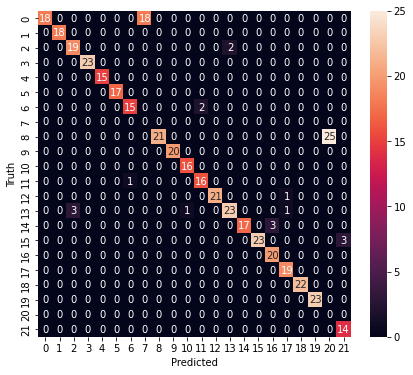

In [33]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import tensorflow as tf
print(classification_report(y_pred, y_correct))
cm = tf.math.confusion_matrix(y_pred, y_correct)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error, mean_absolute_percentage_error
print(accuracy_score(y_pred, y_correct))
print(mean_absolute_error(y_pred, y_correct))
print(mean_squared_error(y_pred, y_correct))
print(max_error(y_pred, y_correct))

0.8636363636363636
1.209090909090909
12.118181818181819
12


# **CREATING RNN MODEL**

In [46]:
from keras.layers import Flatten
model = Sequential()

# adding hidden layers with number of units and activation function.
model.add(LSTM(units = 64, activation = 'relu',input_shape=(7,1))) #hiddenlayer1 with and extra parameter input dimensions which is 16 in out case that is no. of features in training data.
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu')) #hiddenlayer2
model.add(Dense(units = 22, activation = 'sigmoid')) #outputlayer

# compiling our model.
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) #metrics are the list of parameters on which we test our model like accuracy.

In [47]:
# fitting data to train our model and then validating score with validation_data.
model.fit(x_train, y_train, epochs=40, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/40
220/220 [==============================] - 3s 8ms/step - loss: 2.3259 - accuracy: 0.3466 - val_loss: 0.7662 - val_accuracy: 0.7500
Epoch 2/40
220/220 [==============================] - 1s 6ms/step - loss: 0.5240 - accuracy: 0.8131 - val_loss: 0.3054 - val_accuracy: 0.8659
Epoch 3/40
220/220 [==============================] - 1s 6ms/step - loss: 0.2717 - accuracy: 0.9006 - val_loss: 0.2103 - val_accuracy: 0.9159
Epoch 4/40
220/220 [==============================] - 1s 6ms/step - loss: 0.1883 - accuracy: 0.9301 - val_loss: 0.1832 - val_accuracy: 0.9318
Epoch 5/40
220/220 [==============================] - 1s 6ms/step - loss: 0.1514 - accuracy: 0.9386 - val_loss: 0.1691 - val_accuracy: 0.9250
Epoch 6/40
220/220 [==============================] - 1s 6ms/step - loss: 0.1582 - accuracy: 0.9432 - val_loss: 0.2055 - val_accuracy: 0.9341
Epoch 7/40
220/220 [==============================] - 1s 6ms/step - loss: 0.1667 - accuracy: 0.9381 - val_loss: 0.1592 - val_accuracy: 0.9318
Epoch 

In [48]:
y_pred_con = model.predict(x_test)
y_pred, y_correct = [], []

for i in y_test:
    y_correct.append(np.argmax(i))
for j in y_pred_con:
    y_pred.append(np.argmax(j))
    
pred_df = pd.DataFrame()
pred_df['Pred_class'] = y_pred
pred_df['Correct_class'] = y_correct
pred_df

,Pred_class,Correct_class
0,21,21
1,21,21
2,7,7
3,3,3
4,2,2
...,...,...
435,18,18
436,1,1
437,6,6
438,2,2


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      0.85      0.92        26
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17
           6       1.00      0.94      0.97        17
           7       1.00      1.00      1.00        18
           8       0.81      0.89      0.85        19
           9       1.00      1.00      1.00        20
          10       1.00      0.71      0.83        24
          11       0.94      1.00      0.97        17
          12       1.00      1.00      1.00        21
          13       0.56      1.00      0.72        14
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        23
          17       1.00    

Text(42.0, 0.5, 'Truth')

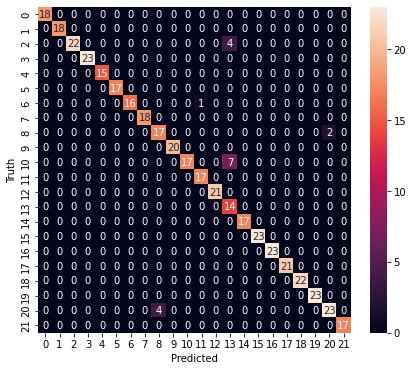

In [49]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import tensorflow as tf
print(classification_report(y_pred, y_correct))
cm = tf.math.confusion_matrix(y_pred, y_correct)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error, mean_absolute_percentage_error
print(accuracy_score(y_pred, y_correct))
print(mean_absolute_error(y_pred, y_correct))
print(mean_squared_error(y_pred, y_correct))
print(max_error(y_pred, y_correct))

0.9590909090909091
0.32272727272727275
3.2636363636363637
12
